# **Pull Data From the MySQL Database**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
load_dotenv()

True

In [3]:
# Fetch credentials and connection info from environment
user = os.getenv("MYSQL_USER")
password = os.getenv("MYSQL_PASSWORD")
host = os.getenv("MYSQL_HOST", "127.0.0.1")
port = int(os.getenv("MYSQL_PORT", "3306"))
database = os.getenv("MYSQL_DATABASE")

# Create SQLAlchemy engine
connection_url = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_url)

In [4]:
# Load the Updated Data
query = "SELECT * FROM banking_data_updated"

# Read data into DataFrame
with engine.connect() as conn:
  df = pd.read_sql(query, conn)

# Display result
print("Connected to database:", database)

Connected to database: analysisfinancial


# **1. Data Preprocessing**

In [5]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail,Mid


In [6]:
df.dtypes

Client ID                           object
Name                                object
Age                                  int64
Location ID                          int64
Joined Bank                 datetime64[ns]
Banking Contact                     object
Nationality                         object
Occupation                          object
Fee Structure                       object
Loyalty Classification              object
Estimated Income                   float64
Superannuation Savings             float64
Amount of Credit Cards               int64
Credit Card Balance                float64
Bank Loans                         float64
Bank Deposits                      float64
Checking Accounts                  float64
Saving Accounts                    float64
Foreign Currency Account           float64
Business Lending                   float64
Properties Owned                     int64
Risk Weighting                       int64
Gender                              object
Investment 

In [7]:
# Calculate the number of days since the joined date
df['Engagement Days'] = (pd.Timestamp.today() - df['Joined Bank']).dt.days
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel,Engagement Days
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low,2269
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid,8625
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid,5657
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial,High,2308
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail,Mid,4750


In [8]:
df.isnull().sum(), df.duplicated().sum()

(Client ID                   0
 Name                        0
 Age                         0
 Location ID                 0
 Joined Bank                 0
 Banking Contact             0
 Nationality                 0
 Occupation                  0
 Fee Structure               0
 Loyalty Classification      0
 Estimated Income            0
 Superannuation Savings      0
 Amount of Credit Cards      0
 Credit Card Balance         0
 Bank Loans                  0
 Bank Deposits               0
 Checking Accounts           0
 Saving Accounts             0
 Foreign Currency Account    0
 Business Lending            0
 Properties Owned            0
 Risk Weighting              0
 Gender                      0
 Investment Advisor          0
 Banking Relationship        0
 Income Lavel                0
 Engagement Days             0
 dtype: int64,
 np.int64(0))

In [9]:
# Select relevant features
features = ['Age', 'Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Bank Deposits', 'Saving Accounts', 'Engagement Days', 
            'Loyalty Classification', 'Gender']
target = ['Risk Weighting']


numeric_cols = ['Age', 'Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Bank Deposits', 'Saving Accounts', 'Engagement Days']
categorical_cols = ['Loyalty Classification', 'Gender']

# **2. Feature Engineering**

In [10]:
df['Loyalty Classification'].unique()

array(['Jade', 'Gold', 'Silver', 'Platinum'], dtype=object)

Map Loyalty Classification (e.g., Silver=1, Gold=2, Jade=3, Platinum=4) and Gender (e.g., Male=0, Female=1).

In [11]:
df['Loyalty Classification'] = df['Loyalty Classification'].map({'Silver': 1, 'Gold': 2, 'Jade': 3, 'Platinum': 4})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

print(f"Transformed Loyality Uniques: {df['Loyalty Classification'].unique()}\nTransformed Gender Uniques: {df['Gender'].unique()}")

Transformed Loyality Uniques: [3 2 1 4]
Transformed Gender Uniques: [0 1]


In [12]:
df['Debt to Income'] = df['Bank Loans'] / df['Estimated Income'].replace(0, 1)
df['Credit Utilization'] = df['Credit Card Balance'] / df['Estimated Income'].replace(0, 1)
df['Savings to Loan'] = df['Saving Accounts'] / df['Bank Loans'].replace(0, 1)
df['Engagement Years'] = df['Engagement Days'] / 365

df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel,Engagement Days,Debt to Income,Credit Utilization,Savings to Loan,Engagement Years
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,3,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,0,Victor Dean,Retail,Low,2269,10.297079,0.006428,0.782400,6.216438
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,3,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,0,Jeremy Porter,Institutional,Mid,8625,4.383937,0.007787,0.271235,23.630137
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,2,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,1,Ernest Knight,Private Bank,Mid,5657,6.194806,0.026885,0.192886,15.498630
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,1,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,0,Eric Shaw,Commercial,High,2308,0.339665,0.011785,1.936424,6.323288
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,4,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,Kevin Kim,Retail,Mid,4750,8.019956,0.028915,0.122437,13.013699


In [13]:
# Update features list with engineered features
features += ['Debt to Income', 'Credit Utilization', 'Savings to Loan', 'Engagement Years']

In [14]:
percentiles = [0, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 0.99, 0.995, 1]

for col in numeric_cols + ['Debt to Income', 'Credit Utilization', 'Savings to Loan']:
  print(f"\nFor Column: {col}\n")
  for p in percentiles:
    if p == 0:
      label = "Min"
    elif p == 1:
      label = "Max"
    else:
      label = f"{float(p*100)}th Percentile"
    
    value = df[col].quantile(p)
    print(f"{label} Value: {value}")


For Column: Age

Min Value: 18.0
1.0th Percentile Value: 18.0
5.0th Percentile Value: 21.0
10.0th Percentile Value: 25.0
25.0th Percentile Value: 34.0
50.0th Percentile Value: 51.0
75.0th Percentile Value: 69.0
85.0th Percentile Value: 75.0
90.0th Percentile Value: 79.0
95.0th Percentile Value: 82.0
99.0th Percentile Value: 85.0
99.5th Percentile Value: 85.0
Max Value: 85.0

For Column: Estimated Income

Min Value: 15919.48
1.0th Percentile Value: 22751.2955
5.0th Percentile Value: 37250.301
10.0th Percentile Value: 50645.876000000004
25.0th Percentile Value: 82475.365
50.0th Percentile Value: 141532.01
75.0th Percentile Value: 239941.315
85.0th Percentile Value: 302053.5034999998
90.0th Percentile Value: 340815.4640000001
95.0th Percentile Value: 393393.60649999994
99.0th Percentile Value: 474952.6635000001
99.5th Percentile Value: 492125.87964999984
Max Value: 521159.98

For Column: Bank Loans

Min Value: 0.0
1.0th Percentile Value: 22649.2376
5.0th Percentile Value: 69613.723
10.0t

In [15]:
df.shape

(2894, 31)

In [16]:
for col in numeric_cols + ['Debt to Income', 'Credit Utilization', 'Savings to Loan']:
  cap = df[col].quantile(0.9955)
  df = df[df[col] <= cap]

df = df.reset_index(drop=True)
df.shape

(2776, 31)

# **3. Supervised Learning (Predicting Risk Weighting)**

In [17]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel,Engagement Days,Debt to Income,Credit Utilization,Savings to Loan,Engagement Years
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,3,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,0,Victor Dean,Retail,Low,2269,10.297079,0.006428,0.782400,6.216438
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,3,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,0,Jeremy Porter,Institutional,Mid,8625,4.383937,0.007787,0.271235,23.630137
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,2,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,1,Ernest Knight,Private Bank,Mid,5657,6.194806,0.026885,0.192886,15.498630
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,1,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,0,Eric Shaw,Commercial,High,2308,0.339665,0.011785,1.936424,6.323288
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,4,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,Kevin Kim,Retail,Mid,4750,8.019956,0.028915,0.122437,13.013699


In [18]:
df['Risk Weighting'].value_counts()

Risk Weighting
2    1166
1     784
3     427
4     280
5     119
Name: count, dtype: int64

In [19]:
df['Risk Weighting'] = df['Risk Weighting'].replace({4: 3, 5:3})
df['Risk Weighting'].value_counts()

Risk Weighting
2    1166
3     826
1     784
Name: count, dtype: int64

In [20]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2498, 13), (278, 13), (2498, 1), (278, 1))

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
print(f"Random Forest Train Score: {rf_model.score(X_train_scaled, y_train)}")

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Train Score: 1.0


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        83
           2       0.62      0.71      0.67       112
           3       0.81      0.65      0.72        83

    accuracy                           0.71       278
   macro avg       0.73      0.70      0.71       278
weighted avg       0.72      0.71      0.71       278





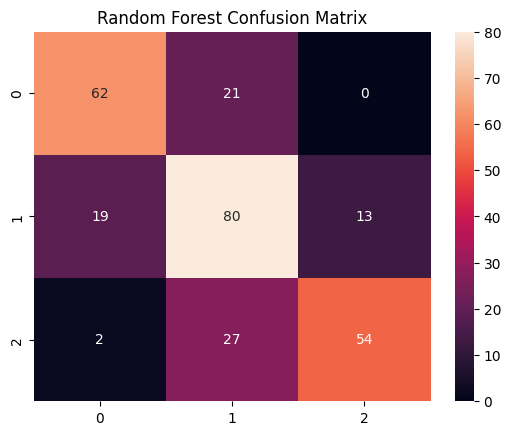

In [23]:
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\n")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [24]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)
print(f"XGBoost Train Score: {xgb_model.score(X_train_scaled, y_train_encoded)}")

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


XGBoost Train Score: 0.999599679743795


XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.75      0.76        83
           2       0.64      0.71      0.68       112
           3       0.78      0.67      0.72        83

    accuracy                           0.71       278
   macro avg       0.73      0.71      0.72       278
weighted avg       0.72      0.71      0.71       278





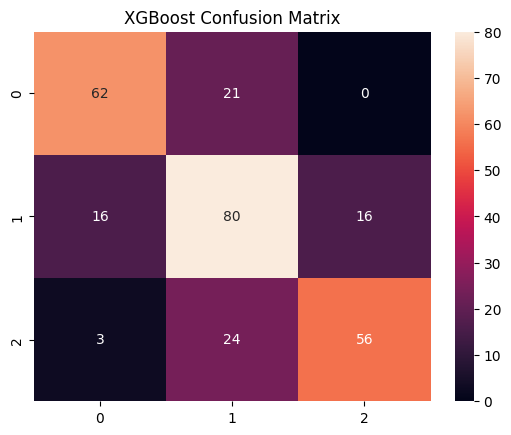

In [25]:
preds = xgb_model.predict(X_test_scaled)
y_pred_xgb = le.inverse_transform(preds)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\n")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

**Random Forest worked well with 71% accuracy**

In [26]:
# Predict risk probabilities for risk scoring

X_scaled = scaler.transform(X)
risk_prob = rf_model.predict_proba(X_scaled)[:, -1]

df['Risk Score'] = risk_prob * 100  # Scale to 0-100
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel,Engagement Days,Debt to Income,Credit Utilization,Savings to Loan,Engagement Years,Risk Score
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,3,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,0,Victor Dean,Retail,Low,2269,10.297079,0.006428,0.782400,6.216438,5.0
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,3,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,0,Jeremy Porter,Institutional,Mid,8625,4.383937,0.007787,0.271235,23.630137,87.0
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,2,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,1,Ernest Knight,Private Bank,Mid,5657,6.194806,0.026885,0.192886,15.498630,80.0
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,1,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,3,0,Eric Shaw,Commercial,High,2308,0.339665,0.011785,1.936424,6.323288,91.0
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,4,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,Kevin Kim,Retail,Mid,4750,8.019956,0.028915,0.122437,13.013699,79.0


In [27]:
df.groupby('Risk Weighting').agg({
  'Risk Score': ['mean', 'max', 'min', 'median']
}).reset_index()

Risk Weighting Risk Score                   
                       mean    max  min median
0              1   2.489796   45.0  0.0    1.0
1              2  11.151801   84.0  0.0    8.0
2              3  81.361985  100.0  2.0   84.0

In [28]:
# Feature importance
feature_importance = pd.DataFrame({
  'Feature': X.columns,
  'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                   Feature  Importance
1         Estimated Income    0.239337
2               Bank Loans    0.111815
3      Credit Card Balance    0.100940
5          Saving Accounts    0.078815
10      Credit Utilization    0.076408
9           Debt to Income    0.075671
4            Bank Deposits    0.074050
11         Savings to Loan    0.059971
12        Engagement Years    0.052102
0                      Age    0.051545
6          Engagement Days    0.050404
7   Loyalty Classification    0.019781
8                   Gender    0.009161


# **4. Unsupervised Learning (K-Means Clustering)**

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Risk Clusters'] = kmeans.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, df['Risk Clusters'])
print(f"\nSilhouette Score for K-Means: {silhouette:.3f}")


Silhouette Score for K-Means: 0.131


In [30]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Risk Clusters')[features].mean()
print("\nCluster Characteristics:")
cluster_summary


Cluster Characteristics:


,Age,Estimated Income,Bank Loans,Credit Card Balance,Bank Deposits,Saving Accounts,Engagement Days,Loyalty Classification,Gender,Debt to Income,Credit Utilization,Savings to Loan,Engagement Years
Risk Clusters,,,,,,,,,,,,,
0,51.766296,235021.923609,998032.749650,5456.710874,1.341975e+06,444894.330366,5331.546900,2.346582,0.459459,5.700621,0.031953,210.415361,14.606978
1,51.626516,150932.238172,453160.091412,2335.503440,4.184984e+05,153908.189515,3079.278163,2.436742,0.529463,4.126773,0.021625,635.422828,8.436379
2,51.223565,146514.496556,458306.694693,2393.683263,4.276037e+05,152676.316838,8229.482377,2.386707,0.502518,4.451659,0.023541,314.375844,22.546527


In [31]:
# Assign cluster-based risk scores (0-100)
cluster_means = df.groupby('Risk Clusters')['Risk Score'].mean().sort_values()
cluster_risk_map = {cluster: i * 50 for i, cluster in enumerate(cluster_means.index)}
df['Cluster Risk Score'] = df['Risk Clusters'].map(cluster_risk_map)

df.groupby('Risk Clusters').agg({
  'Risk Score': ['mean', 'max', 'min', 'median'],
  'Cluster Risk Score': ['mean', 'max', 'min', 'median']
}).reset_index()

Risk Clusters Risk Score                    Cluster Risk Score            \
                      mean    max  min median               mean  max  min   
0             0  57.275040  100.0  0.0   76.0              100.0  100  100   
1             1  22.474870   99.0  0.0    6.0               50.0   50   50   
2             2  20.340383  100.0  0.0    5.0                0.0    0    0   

          
  median  
0  100.0  
1   50.0  
2    0.0

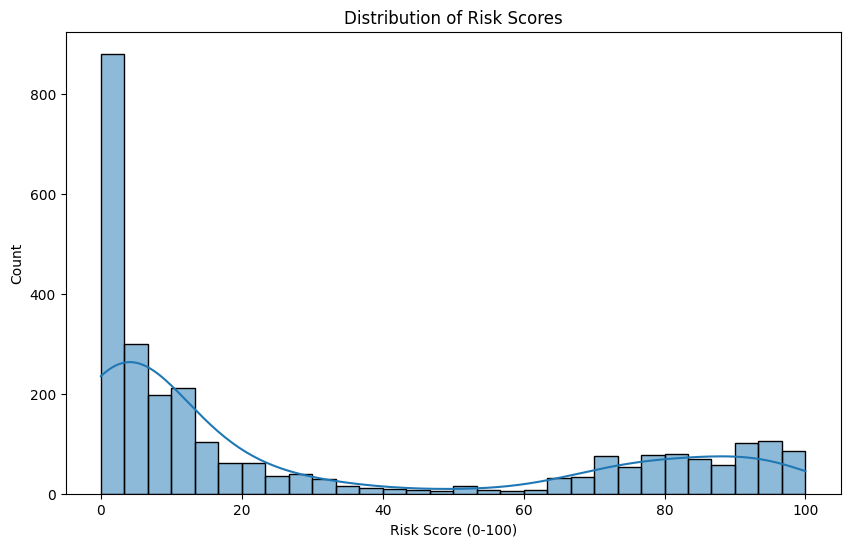

In [32]:
# Plot Risk Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Risk Score'], bins=30, kde=True)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score (0-100)')
plt.ylabel('Count')
plt.savefig('risk_score_distribution.png')
plt.show()

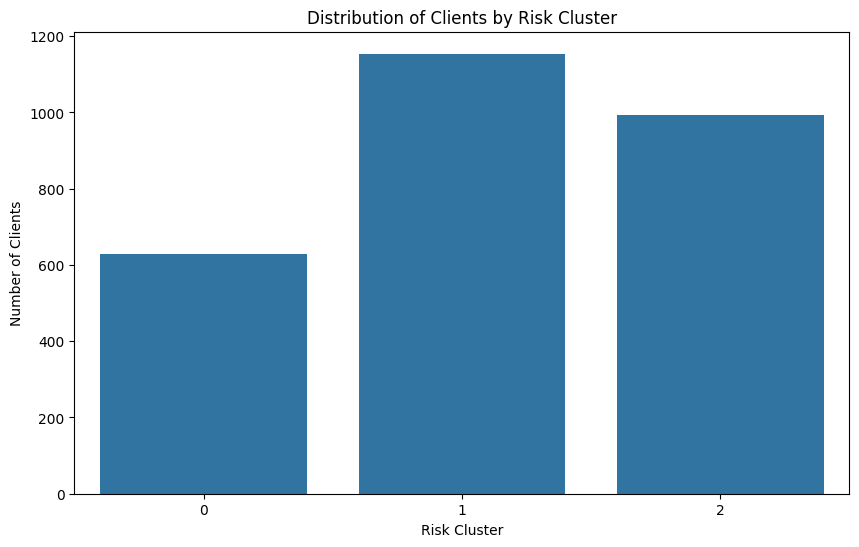

In [33]:
# Plot Cluster Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk Clusters', data=df)
plt.title('Distribution of Clients by Risk Cluster')
plt.xlabel('Risk Cluster')
plt.ylabel('Number of Clients')
plt.savefig('risk_cluster_distribution.png')
plt.show()

In [34]:
# Ensure top features from prior feature importance
top_features = ['Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Saving Accounts', 'Credit Utilization', 'Bank Deposits', 'Debt to Income', 'Savings to Loan']

# Verify required columns
required_columns = ['Client ID', 'Risk Weighting', 'Risk Score', 'Risk Clusters', 'Cluster Risk Score'] + top_features
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"Warning: Missing columns: {missing_cols}")
else:
    print("All required columns present.")

# Map Risk_Cluster to descriptive labels
cluster_labels = {0: 'High Risk', 1: 'Medium Risk', 2: 'Low Risk'}
df['Risk Cluster Label'] = df['Risk Clusters'].map(cluster_labels)

# Step 2: Generate Comprehensive Risk Assessment Report
# Select all clients with key columns
risk_report = df[['Client ID', 'Risk Weighting', 'Risk Score', 'Risk Clusters', 'Cluster Risk Score'] + top_features]

All required columns present.


In [35]:
# Summarize Cluster Characteristics
cluster_summary = df.groupby('Risk Cluster Label')[top_features].mean().reset_index()
print("\nCluster Characteristics (Mean Values):")
cluster_summary


Cluster Characteristics (Mean Values):


,Risk Cluster Label,Estimated Income,Bank Loans,Credit Card Balance,Saving Accounts,Credit Utilization,Bank Deposits,Debt to Income,Savings to Loan
0,High Risk,235021.923609,998032.749650,5456.710874,444894.330366,0.031953,1.341975e+06,5.700621,210.415361
1,Low Risk,146514.496556,458306.694693,2393.683263,152676.316838,0.023541,4.276037e+05,4.451659,314.375844
2,Medium Risk,150932.238172,453160.091412,2335.503440,153908.189515,0.021625,4.184984e+05,4.126773,635.422828


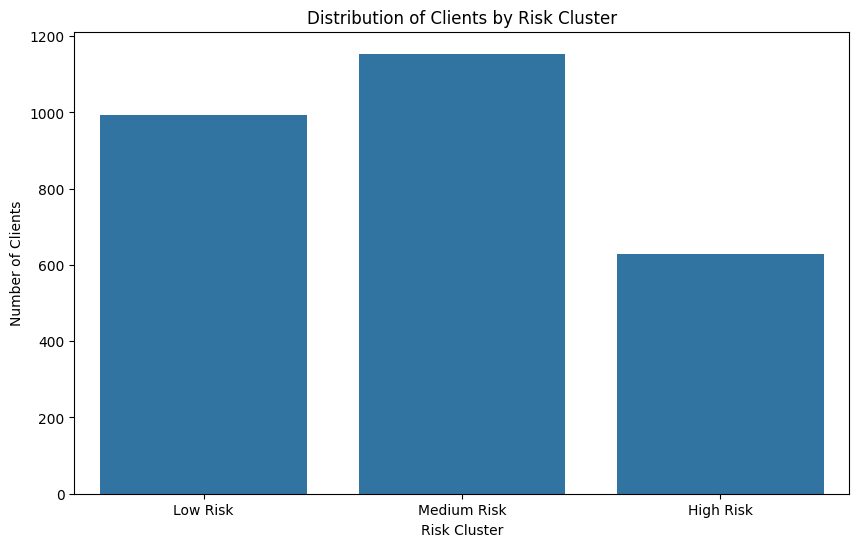

In [36]:
# Bar plot of client counts by Risk Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk Cluster Label', data=df, order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Distribution of Clients by Risk Cluster')
plt.xlabel('Risk Cluster')
plt.ylabel('Number of Clients')
plt.savefig('risk_cluster_distribution.png')
plt.show()

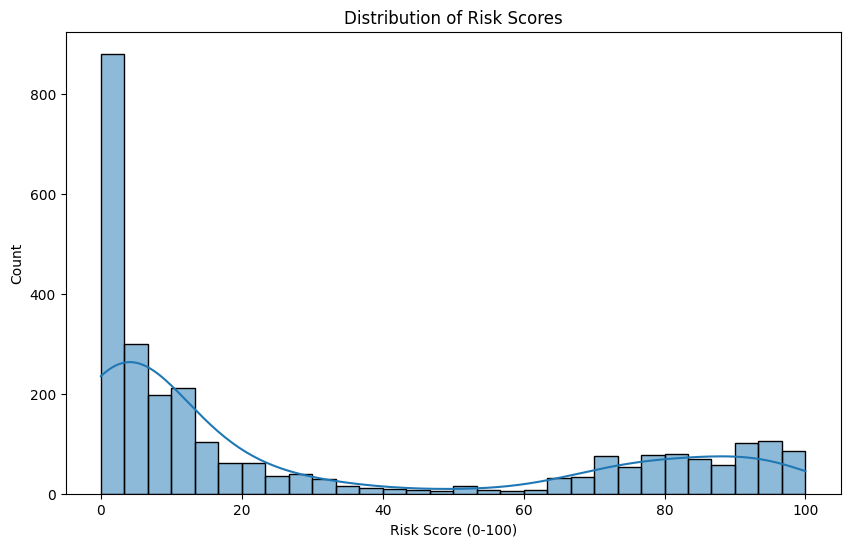

In [37]:
# Histogram of Risk Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Risk Score'], bins=30, kde=True)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score (0-100)')
plt.ylabel('Count')
plt.savefig('risk_score_distribution.png')
plt.show()

In [38]:
# Write DataFrame to MySQL (replace 'your_table_name' with your actual table)
feature_importance.to_sql(name='feature_importance', con=engine, if_exists='replace', index=False)
risk_report.to_sql(name='risk_report', con=engine, if_exists='replace', index=False)
cluster_summary.to_sql(name='cluster_summary', con=engine, if_exists='replace', index=False)
df.to_sql(name='banking_data_with_risk_labels', con=engine, if_exists='replace', index=False)

print("Data pushed successfully to MySQL!")

Data pushed successfully to MySQL!
